# SPOT Kriging in 6 Dimensions: Exact (Rosenbrock Function)

This notebook demonstrates how to use the `Spot` class from `spotpython` for Kriging surrogates on the 6-dimensional Rosenbrock function.

We use a maximum of 100 function evaluations.

Start tensorboard with:

```bash
tensorboard --logdir="runs/"
```

In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
from spotpython.fun.objectivefunctions import Analytical
from spotpython.spot import Spot
from spotpython.utils.init import fun_control_init, design_control_init, surrogate_control_init

Seed set to 123


## Define the 6D Rosenbrock Function

In [2]:
dim = 6
lower = np.full(dim, -2)
upper = np.full(dim, 2)
fun = Analytical().fun_rosenbrock
fun_evals = 100

## Set up SPOT Controls

In [3]:
init_size = dim
use_nystrom = False
seed = 321
max_surrogate_points = fun_evals
max_time = 60

# Compile the necessary imports

In [4]:
fun_control = fun_control_init(
    lower=lower,
    upper=upper,
    fun_evals=fun_evals,
    seed=seed,
    show_progress=True,
    TENSORBOARD_CLEAN=True,
    tensorboard_log=True,
    max_time=max_time
)
design_control = design_control_init(init_size=init_size)
surrogate_control_exact = surrogate_control_init(use_nystrom=use_nystrom, max_surrogate_points=max_surrogate_points)

Seed set to 321


Moving TENSORBOARD_PATH: runs/ to TENSORBOARD_PATH_OLD: runs_OLD/runs_2025_11_05_11_35_07_0
Created spot_tensorboard_path: runs/spot_logs/000_p040025_2025-11-05_11-35-07 for SummaryWriter()


# Sklearn Gaussian Process Regressor as Surrogate

In [5]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import Matern, ConstantKernel

# Used a Matern kernel instead of the standard spotpython RBF kernel
kernel = ConstantKernel(1.0, (1e-2, 1e12)) * Matern(length_scale=1.0, length_scale_bounds=(1e-4, 1e2), nu=2.5)
S_GP = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=100)

spot_exact_sk = Spot(
    fun=fun,
    fun_control=fun_control,
    design_control=design_control,
    surrogate_control=surrogate_control_exact,
    surrogate=S_GP,
)
spot_exact_sk.run()

spotpython tuning: 321.8341532536645 [#---------] 7.00%. Success rate: 0.00% 
spotpython tuning: 321.8341532536645 [#---------] 8.00%. Success rate: 0.00% 
spotpython tuning: 321.8341532536645 [#---------] 9.00%. Success rate: 0.00% 
spotpython tuning: 179.35533825140524 [#---------] 10.00%. Success rate: 25.00% 
spotpython tuning: 147.21603987143845 [#---------] 11.00%. Success rate: 40.00% 
spotpython tuning: 126.87473490284455 [#---------] 12.00%. Success rate: 50.00% 
spotpython tuning: 106.90954193892807 [#---------] 13.00%. Success rate: 57.14% 
spotpython tuning: 77.69348083271842 [#---------] 14.00%. Success rate: 62.50% 
spotpython tuning: 67.649153095507 [##--------] 15.00%. Success rate: 66.67% 
spotpython tuning: 67.649153095507 [##--------] 16.00%. Success rate: 60.00% 
spotpython tuning: 66.9626271912866 [##--------] 17.00%. Success rate: 63.64% 
spotpython tuning: 66.88621978082725 [##--------] 18.00%. Success rate: 66.67% 
spotpython tuning: 63.391023128695885 [##------

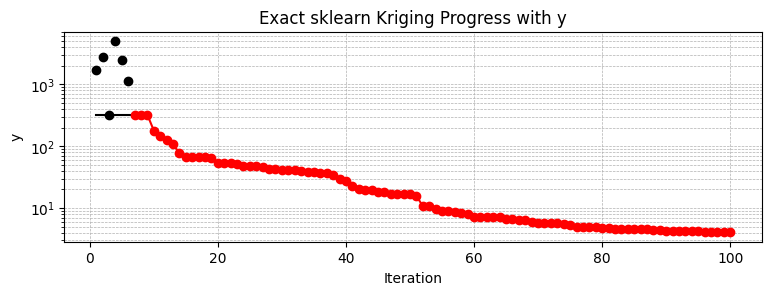

In [6]:
spot_exact_sk.plot_progress(log_y=True, title="Exact sklearn Kriging Progress with y")

In [7]:
print(f"[6D] Exact Kriging y: min y = {spot_exact_sk.min_y:.4f} at x = {spot_exact_sk.min_X}")


[6D] Exact Kriging y: min y = 4.0614 at x = [0.39273266 0.16267094 0.01329175 0.00191027 0.01602282 0.00583742]


# Evaluation of 30 repeats with Kriging and Matern kernel

In [8]:
import json
import numpy as np

# Load results from spot_rosen.json
with open("spot_rosen.json", "r") as f:
    data = json.load(f)

# Extract all "evaluations" values
evals = [
    iteration["sampled_locations"][0]["evaluations"]
    for iteration in data["search_iterations"]
]

# Compute mean and standard deviation
mean_eval = np.mean(evals)
std_eval = np.std(evals)

print(f"Mean of evaluations: {mean_eval:.6f}")
print(f"Standard deviation of evaluations: {std_eval:.6f}")


Mean of evaluations: 3.015181
Standard deviation of evaluations: 1.901997
